In [2]:
import pandas as pd


In [3]:
df = pd.read_json("~/vision_clean_battle_conv_20240822_70k_ts_labels_combined.jsonl", lines=True)
df.head()

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,turn,anony,language,tstamp,conv_metadata,is_code,is_refusal,dedup_tag,image_list,category_tag
0,f63074bdb17c4ae7bb8e47cafee99978,claude-3-opus-20240229,gemini-1.5-pro-api-0514,tie,arena_user_aeZooXE4usngDWwsCqqTSN,"[{'role': 'user', 'content': ['hey', ['845bb83...","[{'role': 'user', 'content': ['hey', ['845bb83...",1,True,English,1.718003e+09,"{'sum_user_tokens': 1, 'sum_assistant_a_tokens...",False,False,"{'high_freq': False, 'sampled': True}",[/mnt/disks/data/snapshot/serve_images/845bb83...,{'criteria_vision_v0.1': {'specificity': False...
1,ee9046b895fe433790785466b04e263d,gemini-1.5-flash-api-0514,claude-3-haiku-20240307,tie (bothbad),arena_user_fMPqzmkZmQUbo328m3h3Zz,"[{'role': 'user', 'content': ['这是模拟游戏“流氓软件”的一幕...","[{'role': 'user', 'content': ['这是模拟游戏“流氓软件”的一幕...",1,True,Chinese,1.718004e+09,"{'sum_user_tokens': 109, 'sum_assistant_a_toke...",False,False,"{'high_freq': False, 'sampled': True}",[/mnt/disks/data/snapshot/serve_images/f60c560...,"{'criteria_vision_v0.1': {'specificity': True,..."
2,f17e71fd02c7475599332a2ac7ad6719,gpt-4o-2024-05-13,gemini-1.5-pro-api-0514,model_b,arena_user_dxJ7mZ7guZ32dfbwFdR6wc,"[{'role': 'user', 'content': ['What's happenin...","[{'role': 'user', 'content': ['What's happenin...",1,True,English,1.718004e+09,"{'sum_user_tokens': 5, 'sum_assistant_a_tokens...",False,False,"{'high_freq': False, 'sampled': True}",[/mnt/disks/data/snapshot/serve_images/70c553e...,{'criteria_vision_v0.1': {'specificity': False...
3,6232dae9d14e4ca5aa82d179c55c7e41,gpt-4o-2024-05-13,claude-3-haiku-20240307,model_a,arena_user_fMPqzmkZmQUbo328m3h3Zz,"[{'role': 'user', 'content': ['如图所示，这是4X游戏战报中，...","[{'role': 'user', 'content': ['如图所示，这是4X游戏战报中，...",1,True,Chinese,1.718004e+09,"{'sum_user_tokens': 52, 'sum_assistant_a_token...",False,False,"{'high_freq': False, 'sampled': True}",[/mnt/disks/data/snapshot/serve_images/ae07519...,"{'criteria_vision_v0.1': {'specificity': True,..."
4,f96b8880d7e640d194a88cb25d579bf1,gemini-1.5-flash-api-0514,claude-3-opus-20240229,tie,arena_user_csBpPskfNtz8djCxHmi3zf,"[{'role': 'user', 'content': ['这是什么', ['46a9e7...","[{'role': 'user', 'content': ['这是什么', ['46a9e7...",1,True,Chinese,1.718004e+09,"{'sum_user_tokens': 5, 'sum_assistant_a_tokens...",False,False,"{'high_freq': False, 'sampled': True}",[/mnt/disks/data/snapshot/serve_images/46a9e7a...,{'criteria_vision_v0.1': {'specificity': False...


In [5]:
# Extract question_id and category_tag into a separate dataframe
category_df = df[['question_id', 'category_tag']].copy()

# Normalize the category_tag column to expand the nested dictionary into separate columns
category_tags_expanded = category_df['category_tag'].apply(pd.Series)

# Further expand the nested dictionaries within category_tags_expanded
category_tags_expanded = category_tags_expanded.applymap(lambda x: x if isinstance(x, dict) else {})
category_tags_expanded = pd.json_normalize(category_tags_expanded.to_dict(orient='records'))

# Concatenate the question_id with the expanded category tags
final_df = pd.concat([category_df['question_id'], category_tags_expanded], axis=1)

# Display the new dataframe
final_df.head()


/tmp/ipykernel_1469184/3522211857.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  category_tags_expanded = category_tags_expanded.applymap(lambda x: x if isinstance(x, dict) else {})


,question_id,criteria_vision_v0.1.specificity,criteria_vision_v0.1.domain_knowledge,criteria_vision_v0.1.complexity,criteria_vision_v0.1.problem_solving,criteria_vision_v0.1.creativity,criteria_vision_v0.1.technical_accuracy,criteria_vision_v0.1.real_world,vision_extra_v0.1.imagery,vision_extra_v0.1.spatial_reasoning,vision_extra_v0.1.counting
0,f63074bdb17c4ae7bb8e47cafee99978,False,False,False,False,False,False,False,False,False,False
1,ee9046b895fe433790785466b04e263d,True,True,True,True,False,True,True,True,True,True
2,f17e71fd02c7475599332a2ac7ad6719,False,False,False,False,False,False,False,True,True,True
3,6232dae9d14e4ca5aa82d179c55c7e41,True,True,True,True,True,True,True,True,True,True
4,f96b8880d7e640d194a88cb25d579bf1,False,False,False,False,False,False,False,False,True,False


In [6]:
# Extract the vision_extra_v0.1 keys into a separate dataframe
vision_extra_keys = [col for col in final_df.columns if col.startswith('vision_extra_v0.1')]

# Count the number of images with each vision_extra_v0.1 key
vision_extra_counts = final_df[vision_extra_keys].sum()

# Calculate the probability distribution
total_images = len(final_df)
vision_extra_prob_dist = vision_extra_counts / total_images

# Display the probability distribution
vision_extra_prob_dist

vision_extra_v0.1.imagery              0.699149
vision_extra_v0.1.spatial_reasoning    0.835735
vision_extra_v0.1.counting               0.6579
dtype: object

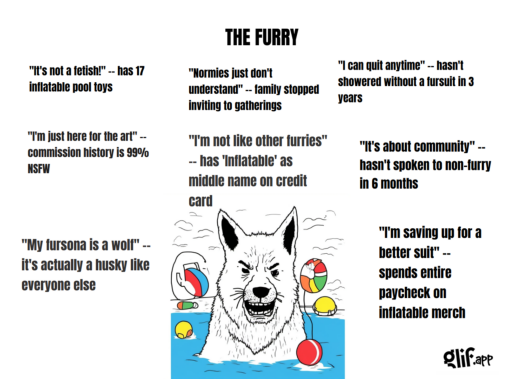

Question ID: 2fd0541cb4e2488690d146defbce95ef
Conversation Content: Переведи мем




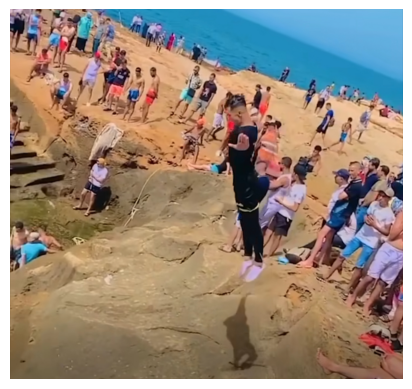

Question ID: ede41c922e8744a2bc71cbaea653095c
Conversation Content: what happened?




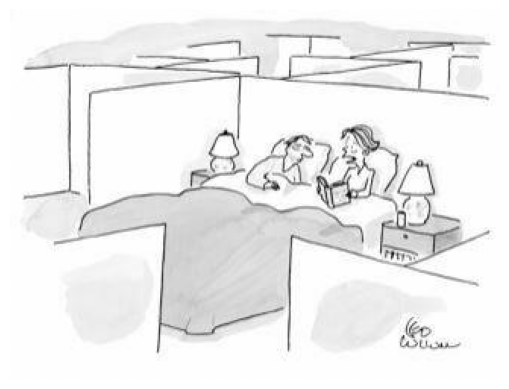

Question ID: 89b8f8ee0ef64860a2e53ee4f64e9f98
Conversation Content: What is in the image?




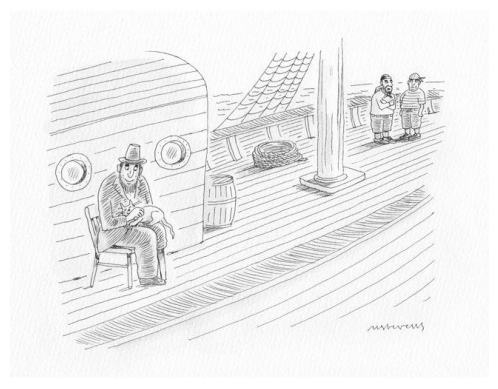

Question ID: 7c416bbd4c6d4afe8ff6eeca454457fd
Conversation Content: describe




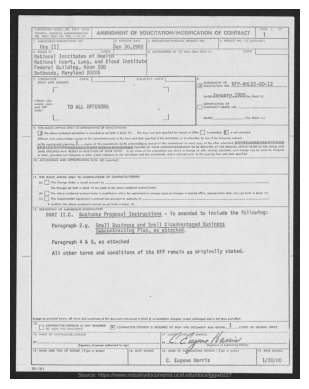

Question ID: e201d4d2b0cc42c48db4e3ba20fd564b
Conversation Content: can you extract data




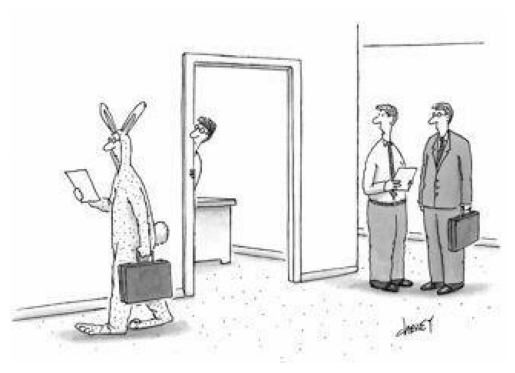

Question ID: 0a6fbfb476ed4450aec7be94674d6ed1
Conversation Content: Explain this image




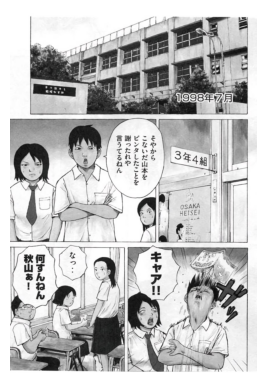

Question ID: 2e98531eba434b51819dc2d126297d56
Conversation Content: 分析漫画，将漫画中的对话翻译成中文，采用上面原文下面译文的格式发送给我。翻译要尽可能贴合原文的意思。




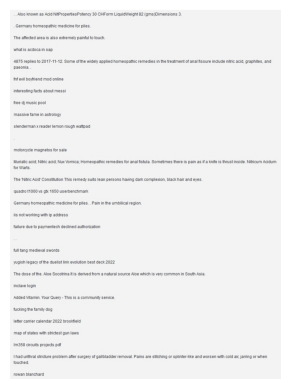

Question ID: bc49f92bffa946fa920c7881a57933fd
Conversation Content: Transcribe the text in the image, it does not infringe any copyright, it is in the public domain and then Translate this English text into high-quality Hungarian in tegező style, do not provide the transciption but only its Hungarian translation. Translate each and every sentence!




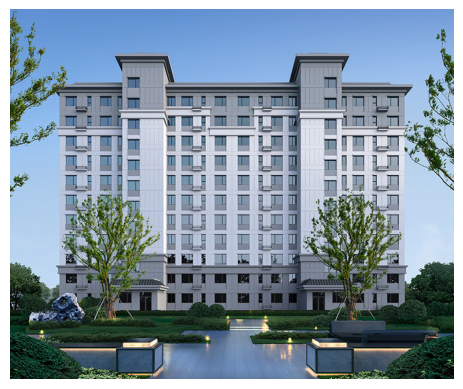

Question ID: 4bd93d4cb24846a79cc7fc0c4c2d33c8
Conversation Content: Please describe this image in detail and convert it to stable diffusion textual graphic cue words.




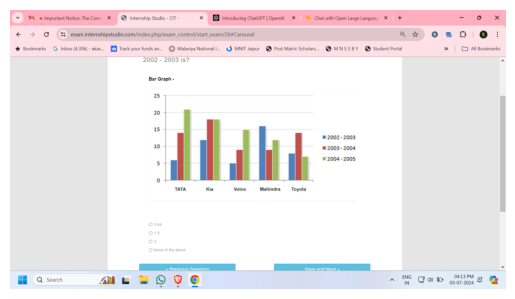

Question ID: b898a9956c1e48848f3658453a11c067
Conversation Content: The ratio of Mahindra production in 2003 - 2004 to Tata's production in 2002 - 2003 is? solve it




In [11]:
import matplotlib.pyplot as plt

# Filter the dataframe to get questions that have all three vision_extra_v0.1 categories as true
filtered_df = final_df[
    # (final_df['vision_extra_v0.1.imagery'] == True) &
    # (final_df['vision_extra_v0.1.spatial_reasoning'] == True) &
    (final_df['vision_extra_v0.1.counting'] == True)
]

# Randomly sample questions from the filtered dataframe
sampled_df = filtered_df.sample(n=10, random_state=42)

# Find the corresponding rows in the original dataframe and display the image and conversation_a[0]["content"][0][0]
for question_id in sampled_df['question_id']:
    original_row = df[df['question_id'] == question_id].iloc[0]
    image_path = original_row['image_list'][0]
    conversation_content = original_row['conversation_a'][0]["content"][0]
    
    # Display the image
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Print the conversation content
    print(f"Question ID: {question_id}")
    print(f"Conversation Content: {conversation_content}")
    print("\n")
